# پیش بینی بیماری تیروئید

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
from scipy.stats import skew
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('t.csv')
df

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00025,0.0300,0.14300,0.133,0.10800,hypothyroidism
1,0.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00190,0.0240,0.10200,0.131,0.07800,hypothyroidism
2,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00090,0.0170,0.07700,0.090,0.08500,hypothyroidism
3,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00025,0.0260,0.13900,0.090,0.15300,hypothyroidism
4,0.69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00025,0.0160,0.08600,0.070,0.12300,hypothyroidism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00232,0.0201,0.11329,0.096,0.11776,hypothyroidism
7195,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00150,0.0201,0.09000,0.082,0.11000,hypothyroidism
7196,0.26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00100,0.0201,0.08000,0.075,0.10700,hypothyroidism
7197,0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00160,0.0201,0.09800,0.091,0.10800,hypothyroidism


In [3]:
df.shape

(7199, 22)

In [4]:
df.index

RangeIndex(start=0, stop=7199, step=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7199 entries, 0 to 7198
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        7199 non-null   float64
 1   Sex                        7199 non-null   float64
 2   On_thyroxine               7199 non-null   float64
 3   Query_on_thyroxine         7199 non-null   float64
 4   On_antithyroid_medication  7199 non-null   float64
 5   Sick                       7199 non-null   float64
 6   Pregnant                   7199 non-null   float64
 7   Thyroid_surgery            7199 non-null   float64
 8   I131_treatment             7199 non-null   float64
 9   Query_hypothyroid          7199 non-null   float64
 10  Query_hyperthyroid         7199 non-null   float64
 11  Lithium                    7199 non-null   float64
 12  Goitre                     7199 non-null   float64
 13  Tumor                      7199 non-null   float

In [6]:
df.isnull().sum()

Age                          0
Sex                          0
On_thyroxine                 0
Query_on_thyroxine           0
On_antithyroid_medication    0
Sick                         0
Pregnant                     0
Thyroid_surgery              0
I131_treatment               0
Query_hypothyroid            0
Query_hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
dtype: int64

In [7]:
df.dtypes

Age                          float64
Sex                          float64
On_thyroxine                 float64
Query_on_thyroxine           float64
On_antithyroid_medication    float64
Sick                         float64
Pregnant                     float64
Thyroid_surgery              float64
I131_treatment               float64
Query_hypothyroid            float64
Query_hyperthyroid           float64
Lithium                      float64
Goitre                       float64
Tumor                        float64
Hypopituitary                float64
Psych                        float64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
Class                         object
dtype: object

In [8]:
df.columns

Index(['Age', 'Sex', 'On_thyroxine', 'Query_on_thyroxine',
       'On_antithyroid_medication', 'Sick', 'Pregnant', 'Thyroid_surgery',
       'I131_treatment', 'Query_hypothyroid', 'Query_hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'Class'],
      dtype='object')

In [9]:
df.nunique()

Age                           98
Sex                            2
On_thyroxine                   2
Query_on_thyroxine             2
On_antithyroid_medication      2
Sick                           2
Pregnant                       2
Thyroid_surgery                2
I131_treatment                 2
Query_hypothyroid              2
Query_hyperthyroid             2
Lithium                        2
Goitre                         2
Tumor                          2
Hypopituitary                  2
Psych                          2
TSH                          326
T3                            85
TT4                          272
T4U                          161
FTI                          466
Class                          3
dtype: int64

In [10]:
print('before drop duplicates: ',df.shape)
df=df.drop_duplicates()
print('after drop duplicates: ',df.shape)

before drop duplicates:  (7199, 22)
after drop duplicates:  (7128, 22)


In [11]:
df['Age']=df['Age']*100
df['Age']=df['Age'].astype(int)
df['Sex']=df['Sex'].astype(int)
df['On_thyroxine']=df['On_thyroxine'].astype(int)
df['Query_on_thyroxine']=df['Query_on_thyroxine'].astype(int)
df['On_antithyroid_medication']=df['On_antithyroid_medication'].astype(int)
df['Sick']=df['Sick'].astype(int)
df['Pregnant']=df['Pregnant'].astype(int)
df['Thyroid_surgery']=df['Thyroid_surgery'].astype(int)
df['I131_treatment']=df['I131_treatment'].astype(int)
df['Query_hypothyroid']=df['Query_hypothyroid'].astype(int)
df['Query_hyperthyroid']=df['Query_hyperthyroid'].astype(int)
df['Lithium']=df['Lithium'].astype(int)
df['Goitre']=df['Goitre'].astype(int)
df['Tumor']=df['Tumor'].astype(int)
df['Hypopituitary']=df['Hypopituitary'].astype(int)
df['Psych']=df['Psych'].astype(int)
df.head(10)

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,hypothyroidism
1,47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,hypothyroidism
2,64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,hypothyroidism
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,hypothyroidism
4,69,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.016,0.086,0.070,0.123,hypothyroidism
5,85,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.023,0.128,0.104,0.121,hypothyroidism
6,48,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00208,0.020,0.086,0.078,0.110,hypothyroidism
7,67,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.00130,0.024,0.087,0.109,0.080,hypothyroidism
8,62,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.01100,0.008,0.073,0.074,0.098,hyperthyroidism
9,18,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0.00010,0.023,0.098,0.085,0.115,hypothyroidism


In [12]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 7128 observations with 22 features.


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'On_thyroxine'}>,
        <Axes: title={'center': 'Query_on_thyroxine'}>,
        <Axes: title={'center': 'On_antithyroid_medication'}>,
        <Axes: title={'center': 'Sick'}>],
       [<Axes: title={'center': 'Pregnant'}>,
        <Axes: title={'center': 'Thyroid_surgery'}>,
        <Axes: title={'center': 'I131_treatment'}>,
        <Axes: title={'center': 'Query_hypothyroid'}>,
        <Axes: title={'center': 'Query_hyperthyroid'}>,
        <Axes: title={'center': 'Lithium'}>],
       [<Axes: title={'center': 'Goitre'}>,
        <Axes: title={'center': 'Tumor'}>,
        <Axes: title={'center': 'Hypopituitary'}>,
        <Axes: title={'center': 'Psych'}>,
        <Axes: title={'center': 'TSH'}>, <Axes: title={'center': 'T3'}>],
       [<Axes: title={'center': 'TT4'}>, <Axes: title={'center': 'T4U'}>,
        <Axes: title={'center': 'FTI'}>, <Axes: >, <Axes: >, <Axes: >],
     

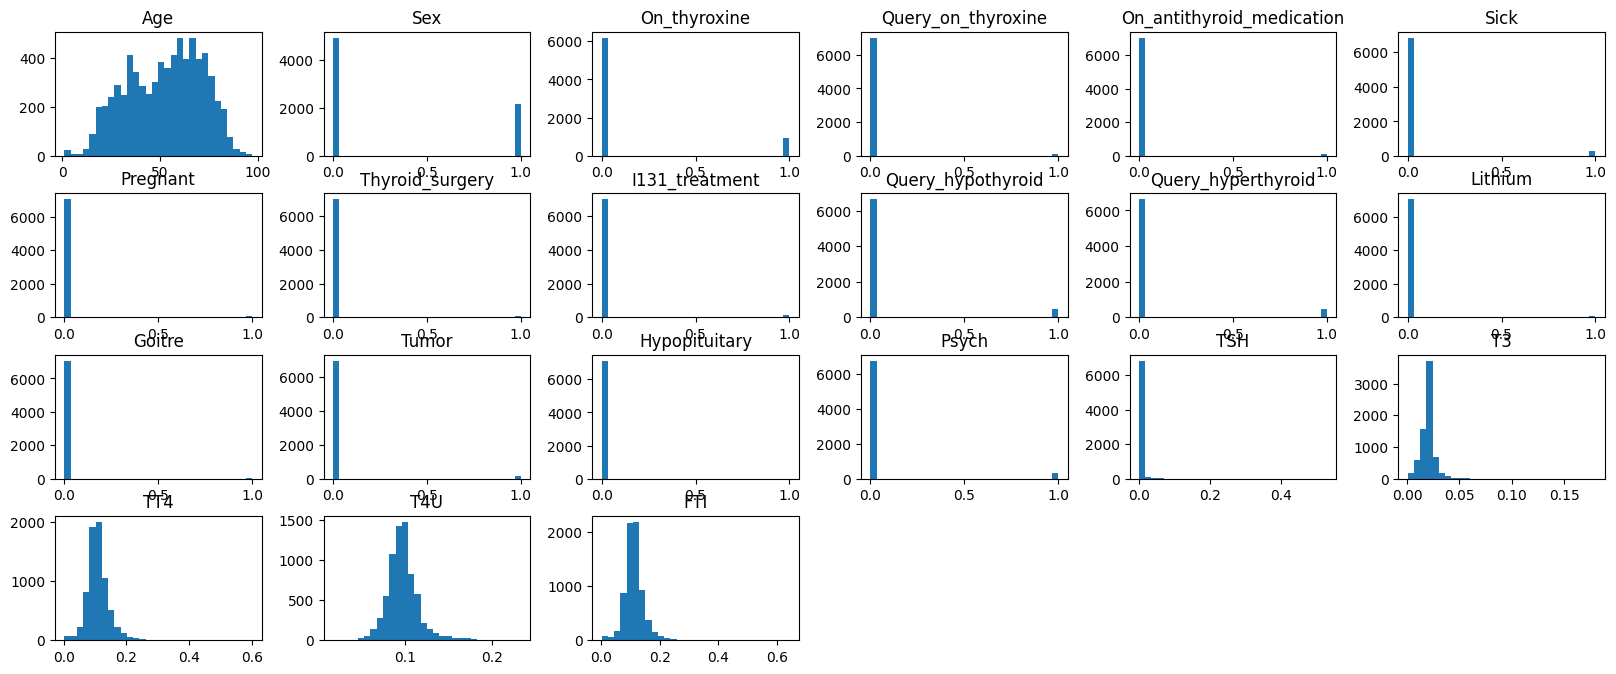

In [13]:
df.hist(figsize=(20,10), grid=False, layout=(5, 6), bins = 30)

In [14]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object_]).columns

In [15]:
categorical_features

Index(['Class'], dtype='object')

In [16]:
skew_values = skew(df[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
14,Hypopituitary,84.409716
16,TSH,14.449517
12,Goitre,10.854580
6,Pregnant,9.401898
11,Lithium,8.680012
4,On_antithyroid_medication,8.680012
7,Thyroid_surgery,8.221230
3,Query_on_thyroxine,7.825090
8,I131_treatment,7.511133
13,Tumor,5.980437


In [17]:
df['Class'].unique()

array(['hypothyroidism', 'hyperthyroidism', 'normal'], dtype=object)

In [18]:
label_encoder= LabelEncoder()

In [19]:
df['Class'] = label_encoder.fit_transform(df['Class'])
df['Class'].unique()

array([1, 0, 2])

<Axes: xlabel='Class', ylabel='count'>

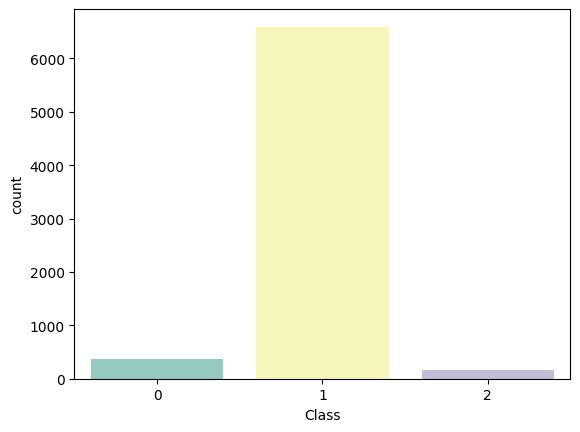

In [20]:
sns.countplot(x = 'Class', data = df, palette="Set3")

In [21]:
#df.sort_index(axis=1, ascending=False, inplace=True)
#df.head(10)

In [22]:
#sns.pairplot(df, diag_kind='kde')
#plt.show()

In [23]:
corr=df.corr()

<Axes: >

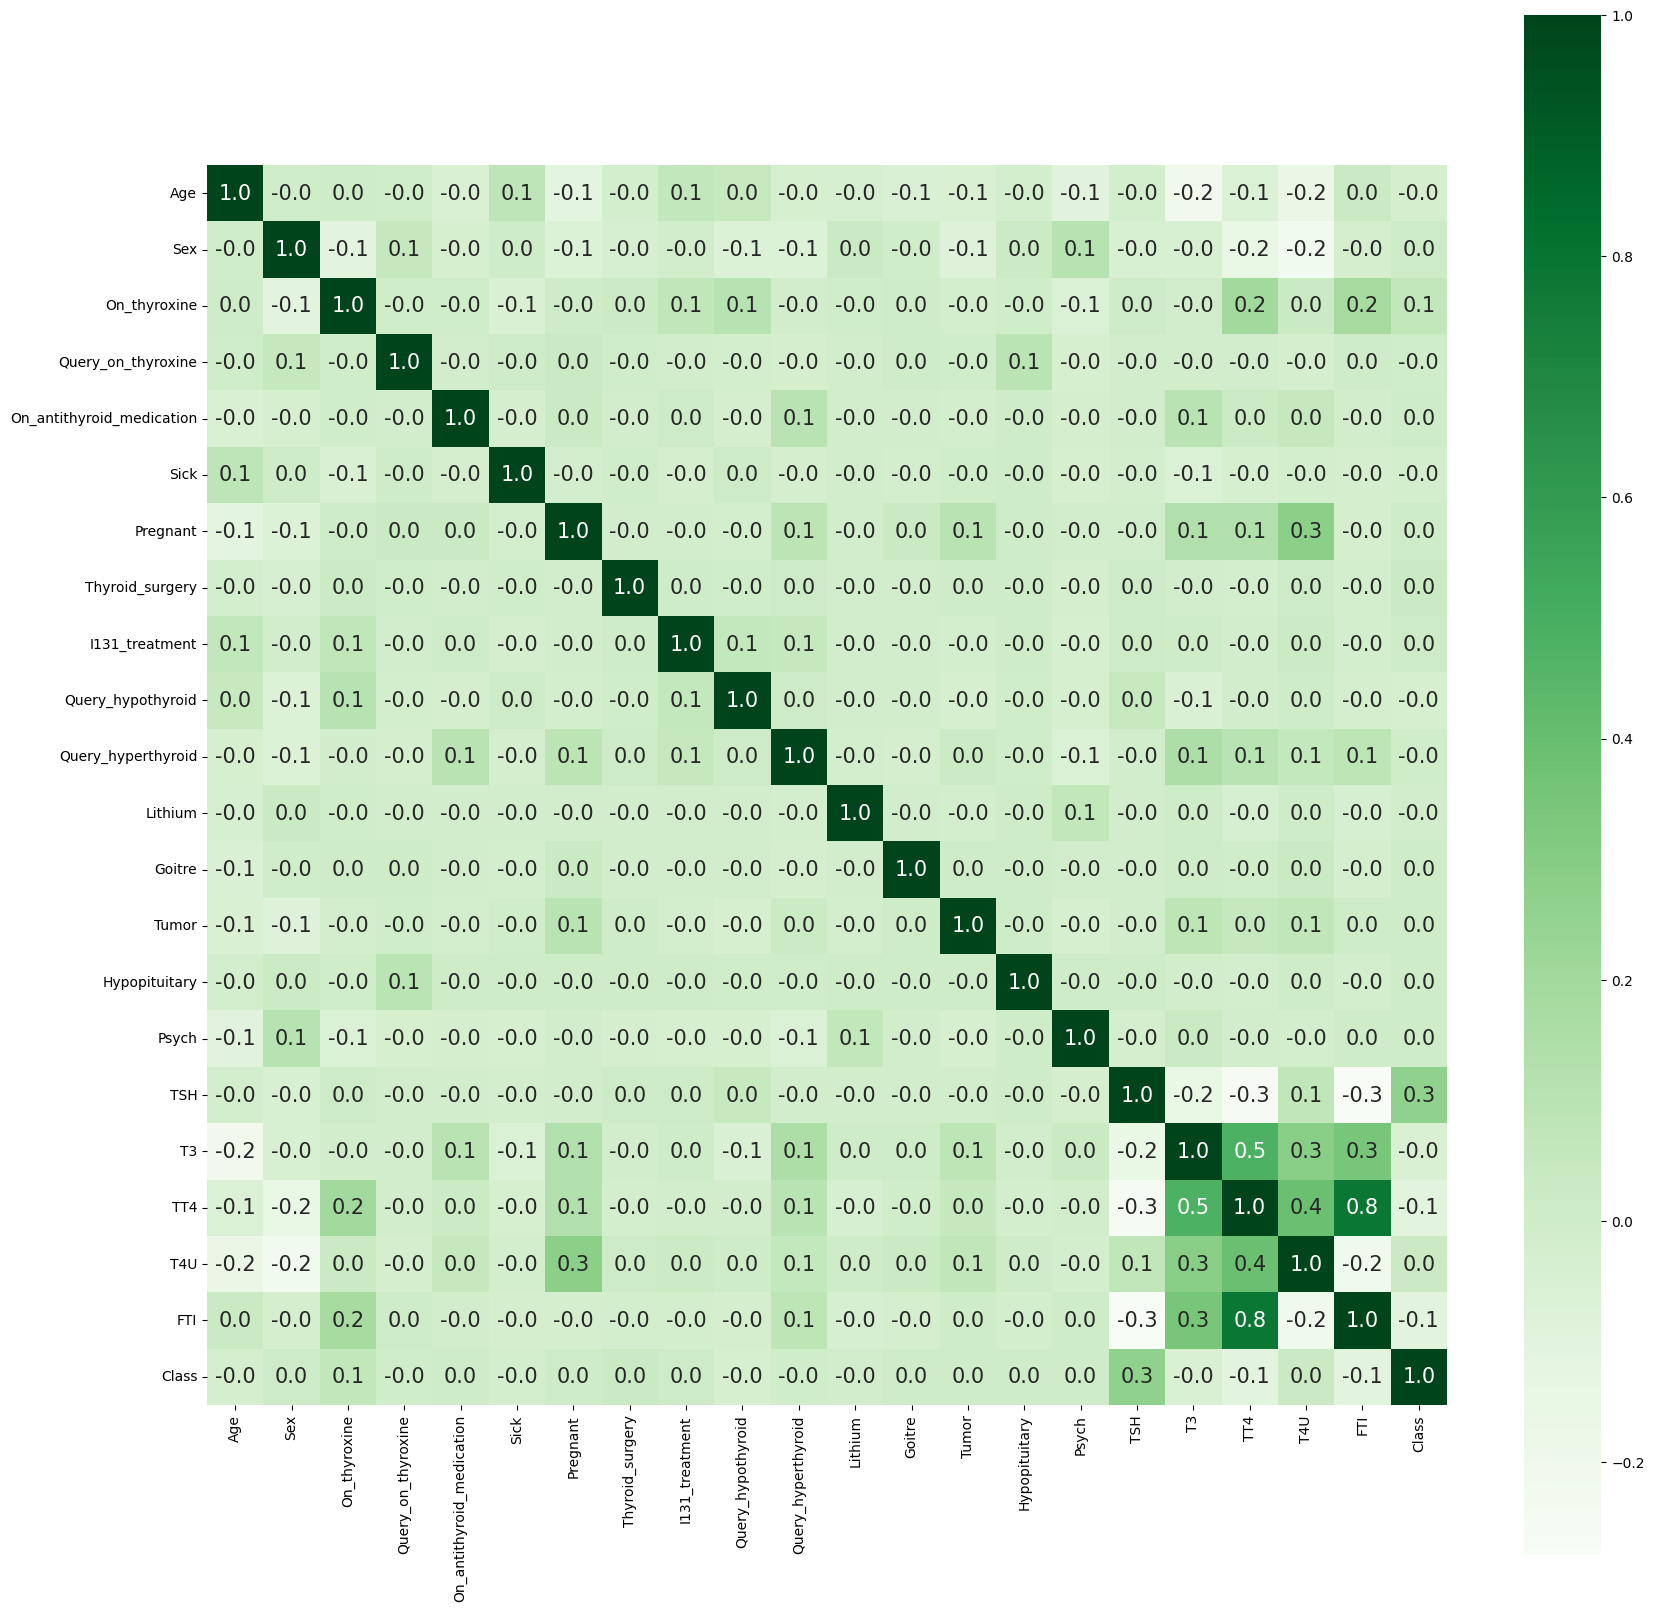

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

<Axes: >

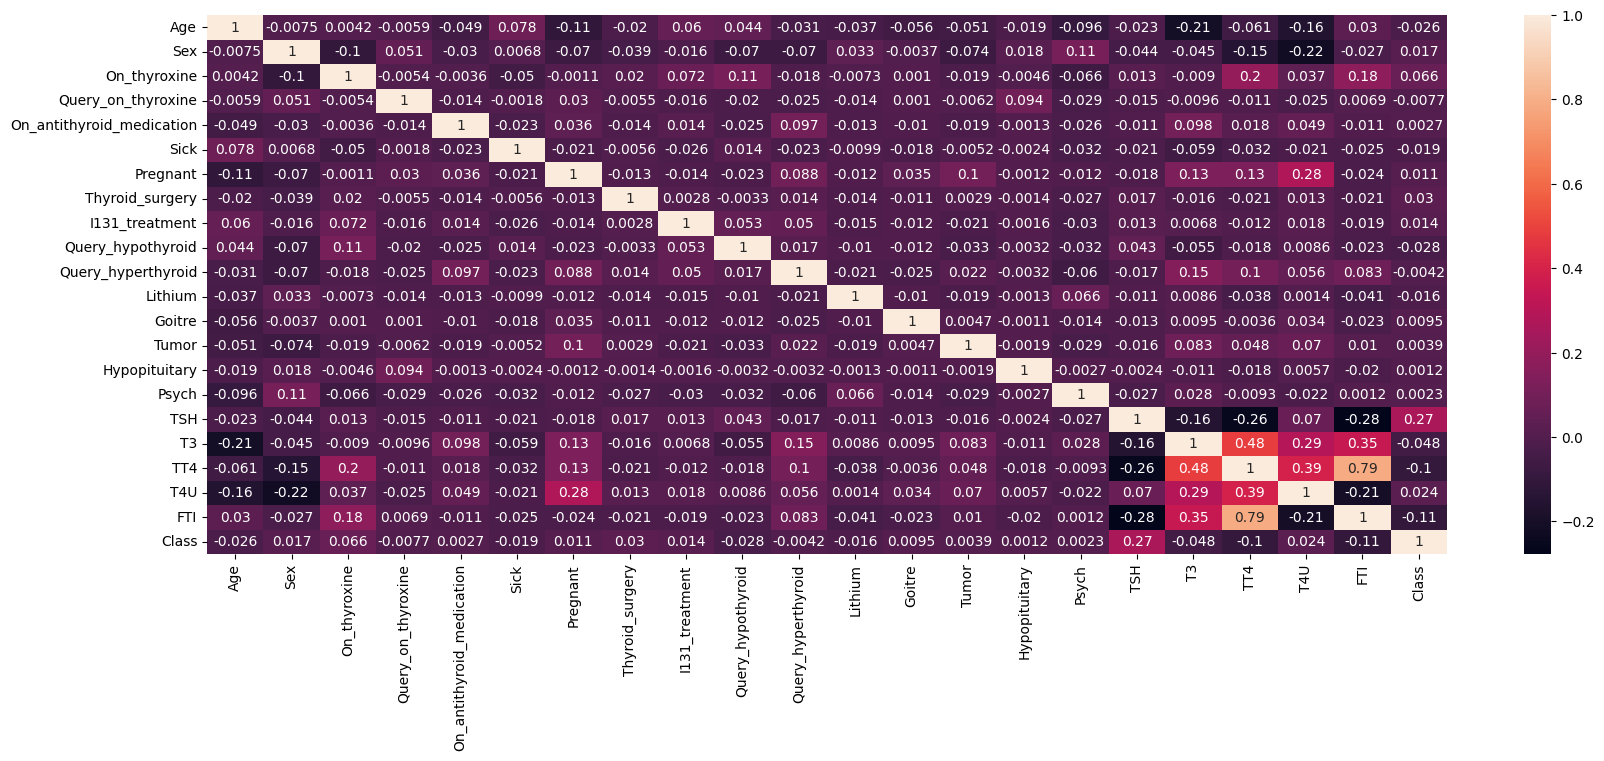

In [25]:
import seaborn as sb

plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

In [26]:
df.sort_index(axis=1, ascending=False, inplace=True)
df.head(10)

,Tumor,Thyroid_surgery,TT4,TSH,T4U,T3,Sick,Sex,Query_on_thyroxine,Query_hypothyroid,...,Pregnant,On_thyroxine,On_antithyroid_medication,Lithium,I131_treatment,Hypopituitary,Goitre,FTI,Class,Age
0,0,0,0.143,0.00025,0.133,0.030,0,0,0,0,...,0,0,0,0,0,0,0,0.108,1,24
1,0,0,0.102,0.00190,0.131,0.024,0,0,0,0,...,0,0,0,0,0,0,0,0.078,1,47
2,0,0,0.077,0.00090,0.090,0.017,0,1,0,0,...,0,0,0,0,0,0,0,0.085,1,64
3,0,0,0.139,0.00025,0.090,0.026,0,0,0,0,...,0,0,0,0,0,0,0,0.153,1,23
4,0,0,0.086,0.00025,0.070,0.016,0,1,0,0,...,0,0,0,0,0,0,0,0.123,1,69
5,0,0,0.128,0.00025,0.104,0.023,0,1,0,0,...,0,0,0,0,0,0,0,0.121,1,85
6,0,0,0.086,0.00208,0.078,0.020,0,1,0,0,...,0,0,0,0,0,0,0,0.110,1,48
7,0,0,0.087,0.00130,0.109,0.024,0,0,0,0,...,0,1,0,0,0,0,0,0.080,1,67
8,0,0,0.073,0.01100,0.074,0.008,1,0,0,0,...,0,0,0,0,0,0,0,0.098,0,62
9,0,0,0.098,0.00010,0.085,0.023,0,1,0,0,...,0,0,0,0,0,0,0,0.115,1,18


In [27]:
df.corr()

,Tumor,Thyroid_surgery,TT4,TSH,T4U,T3,Sick,Sex,Query_on_thyroxine,Query_hypothyroid,...,Pregnant,On_thyroxine,On_antithyroid_medication,Lithium,I131_treatment,Hypopituitary,Goitre,FTI,Class,Age
Tumor,1.000000,0.002940,0.048158,-0.015901,0.070304,0.082542,-0.005157,-0.073768,-0.006183,-0.032675,...,0.101931,-0.018936,-0.018511,-0.018511,-0.021301,-0.001928,0.004658,0.010053,0.003946,-0.051112
Thyroid_surgery,0.002940,1.000000,-0.020756,0.017118,0.012752,-0.015678,-0.005604,-0.038579,-0.005492,-0.003284,...,-0.012610,0.019988,-0.013633,-0.013633,0.002765,-0.001420,-0.010953,-0.021291,0.029921,-0.020364
TT4,0.048158,-0.020756,1.000000,-0.256876,0.394111,0.481186,-0.031626,-0.151252,-0.010907,-0.017604,...,0.128080,0.200688,0.017877,-0.038261,-0.011973,-0.018160,-0.003636,0.787516,-0.100919,-0.060578
TSH,-0.015901,0.017118,-0.256876,1.000000,0.070218,-0.156851,-0.020520,-0.044376,-0.014917,0.042783,...,-0.017632,0.012973,-0.010938,-0.010839,0.012779,-0.002381,-0.012857,-0.277163,0.266125,-0.022530
T4U,0.070304,0.012752,0.394111,0.070218,1.000000,0.289061,-0.020910,-0.221378,-0.024595,0.008578,...,0.277339,0.037103,0.049414,0.001391,0.018266,0.005663,0.034149,-0.207159,0.023833,-0.161757
T3,0.082542,-0.015678,0.481186,-0.156851,0.289061,1.000000,-0.059456,-0.044886,-0.009644,-0.054954,...,0.129775,-0.008997,0.098085,0.008619,0.006847,-0.010901,0.009515,0.349873,-0.048442,-0.209520
Sick,-0.005157,-0.005604,-0.031626,-0.020520,-0.020910,-0.059456,1.000000,0.006809,-0.001750,0.013814,...,-0.021111,-0.050224,-0.022823,-0.009869,-0.026263,-0.002377,-0.018336,-0.025332,-0.019174,0.078251
Sex,-0.073768,-0.038579,-0.151252,-0.044376,-0.221378,-0.044886,0.006809,1.000000,0.051457,-0.069510,...,-0.069979,-0.104432,-0.029591,0.032732,-0.016122,0.017804,-0.003701,-0.027065,0.016736,-0.007539
Query_on_thyroxine,-0.006183,-0.005492,-0.010907,-0.014917,-0.024595,-0.009644,-0.001750,0.051457,1.000000,-0.019823,...,0.030337,-0.005436,-0.014303,-0.014303,-0.016458,0.094180,0.001016,0.006925,-0.007718,-0.005852
Query_hypothyroid,-0.032675,-0.003284,-0.017604,0.042783,0.008578,-0.054954,0.013814,-0.069510,-0.019823,1.000000,...,-0.022587,0.111471,-0.025257,-0.010181,0.052860,-0.003154,-0.011874,-0.023238,-0.028235,0.044227


In [28]:
from scipy.stats import pearsonr,spearmanr
L=[]
for i in df.columns:
    pearsonCor,_=pearsonr(df[i],df['Class'])
    L.append(pearsonCor)
    print(i,' - pearsonCor={}'.format(pearsonCor))

Tumor  - pearsonCor=0.003946293536560534
Thyroid_surgery  - pearsonCor=0.029920815182650162
TT4  - pearsonCor=-0.10091895810207094
TSH  - pearsonCor=0.266124591792598
T4U  - pearsonCor=0.023832906661653653
T3  - pearsonCor=-0.048442023120597165
Sick  - pearsonCor=-0.019174371164369118
Sex  - pearsonCor=0.016736109808545754
Query_on_thyroxine  - pearsonCor=-0.007718171524716518
Query_hypothyroid  - pearsonCor=-0.028234568078814404
Query_hyperthyroid  - pearsonCor=-0.004182179008976418
Psych  - pearsonCor=0.0023197310682134724
Pregnant  - pearsonCor=0.010949392354119528
On_thyroxine  - pearsonCor=0.06645066457175253
On_antithyroid_medication  - pearsonCor=0.002657055695866434
Lithium  - pearsonCor=-0.0157040620938924
I131_treatment  - pearsonCor=0.01362168559111882
Hypopituitary  - pearsonCor=0.0012330591096779092
Goitre  - pearsonCor=0.009510082631005766
FTI  - pearsonCor=-0.10517990081154437
Class  - pearsonCor=1.0
Age  - pearsonCor=-0.025806984677604408


In [29]:
L.sort(reverse=True)
L

[1.0,
 0.266124591792598,
 0.06645066457175253,
 0.029920815182650162,
 0.023832906661653653,
 0.016736109808545754,
 0.01362168559111882,
 0.010949392354119528,
 0.009510082631005766,
 0.003946293536560534,
 0.002657055695866434,
 0.0023197310682134724,
 0.0012330591096779092,
 -0.004182179008976418,
 -0.007718171524716518,
 -0.0157040620938924,
 -0.019174371164369118,
 -0.025806984677604408,
 -0.028234568078814404,
 -0.048442023120597165,
 -0.10091895810207094,
 -0.10517990081154437]

<Axes: >

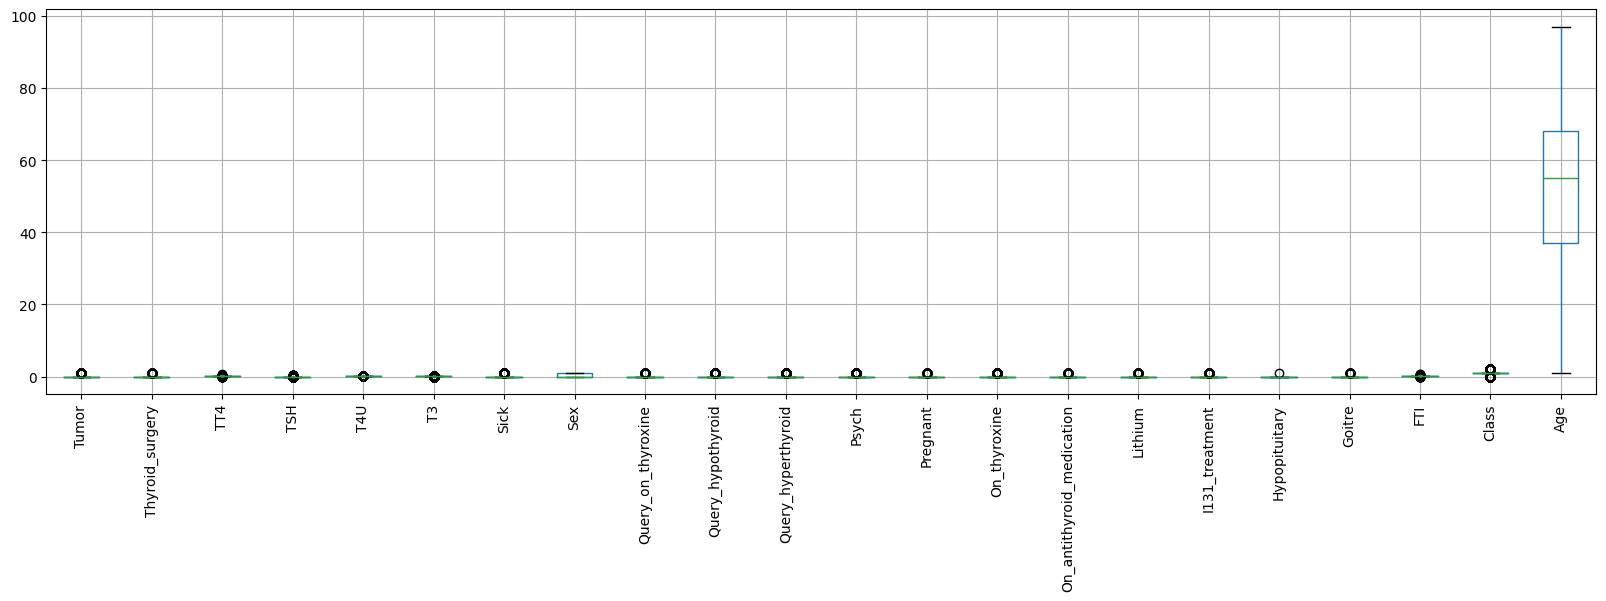

In [30]:
df.boxplot( rot = 90, figsize=(20,5))

<Axes: >

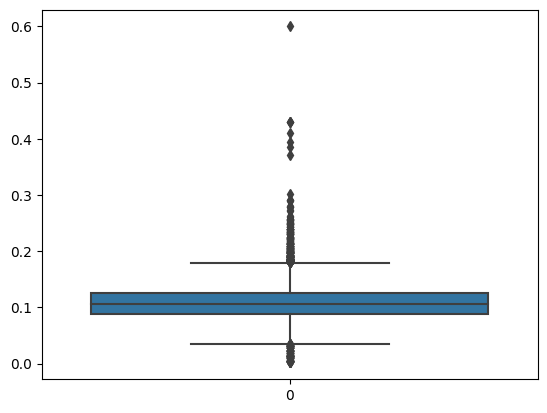

In [31]:
sns.boxplot(df['TT4'])

In [32]:
#df=df[(df['TT4']<0.17) & (df['TT4']>0.050)]
#sns.boxplot(df['TT4'])

<Axes: >

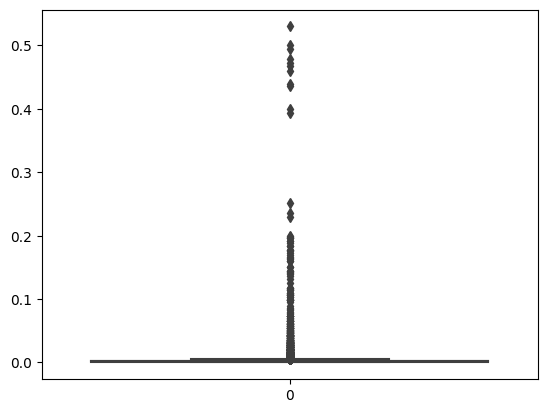

In [33]:
sns.boxplot(df['TSH'])

<Axes: >

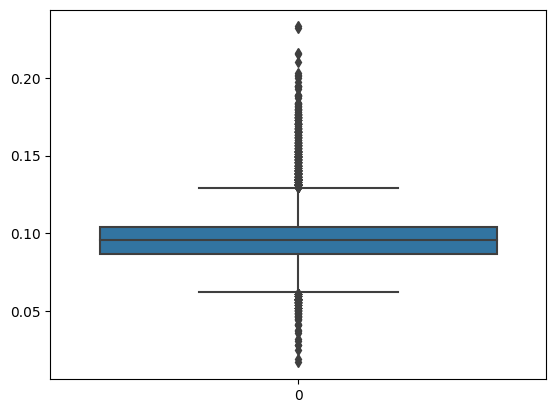

In [34]:
sns.boxplot(df['T4U'])

<Axes: >

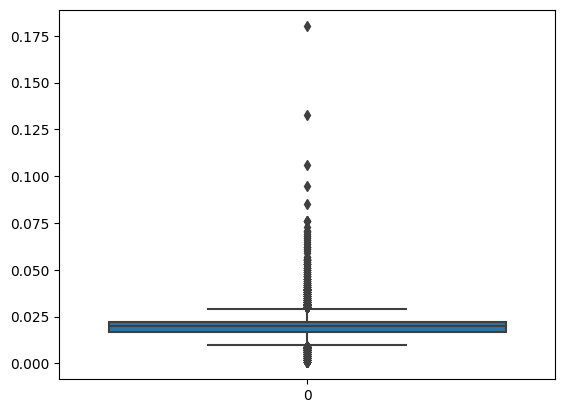

In [35]:
sns.boxplot(df['T3'])

<Axes: >

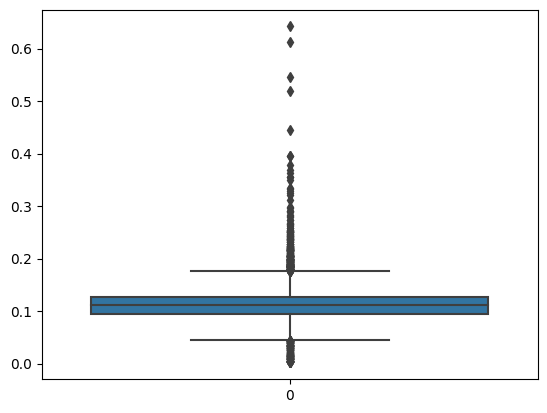

In [36]:
sns.boxplot(df['FTI'])

In [37]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.5)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Tumor                         0.000
Thyroid_surgery               0.000
TT4                           0.036
TSH                           0.002
T4U                           0.017
T3                            0.005
Sick                          0.000
Sex                           1.000
Query_on_thyroxine            0.000
Query_hypothyroid             0.000
Query_hyperthyroid            0.000
Psych                         0.000
Pregnant                      0.000
On_thyroxine                  0.000
On_antithyroid_medication     0.000
Lithium                       0.000
I131_treatment                0.000
Hypopituitary                 0.000
Goitre                        0.000
FTI                           0.033
Class                         0.000
Age                          31.000
dtype: float64

In [38]:
#show outlier data
Upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

      Tumor  Thyroid_surgery    TT4    TSH    T4U     T3   Sick    Sex  \
0     False            False  False  False   True   True  False  False   
1     False            False  False  False   True  False  False  False   
2     False            False  False  False  False  False  False  False   
3     False            False  False  False  False  False  False  False   
4     False            False  False  False  False  False  False  False   
...     ...              ...    ...    ...    ...    ...    ...    ...   
7193  False            False  False  False  False  False  False  False   
7195  False            False  False  False  False  False  False  False   
7196  False            False  False  False  False  False  False  False   
7197  False            False  False  False  False  False  False  False   
7198  False            False  False  False  False  False  False  False   

      Query_on_thyroxine  Query_hypothyroid  ...  Pregnant  On_thyroxine  \
0                  False           

In [39]:
from sklearn.preprocessing import scale,StandardScaler,normalize,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

ardata=normalize(df,norm='l2',axis=0)
ardata = StandardScaler().fit(ardata).transform(ardata)
#ardata=MinMaxScaler(feature_range=(0,1)).fit_transform(ardata)
DFdata=pd.DataFrame(ardata,columns=df.columns)
labels = DFdata['Class']
data=DFdata.drop('Class',axis=1)
labels = label_encoder.fit_transform(labels)

In [40]:
from sklearn.linear_model import Lasso

ls=Lasso(alpha=0.1)
ls.fit(data,labels)

z=ls.coef_
z

array([ 0.,  0., -0.,  0.,  0., -0., -0.,  0., -0., -0., -0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0., -0., -0.])

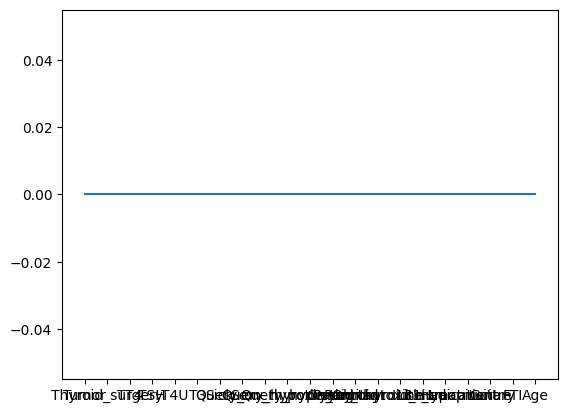

In [41]:
plt.plot(data.columns,z)
plt.show()

In [42]:
X = data  
y = labels

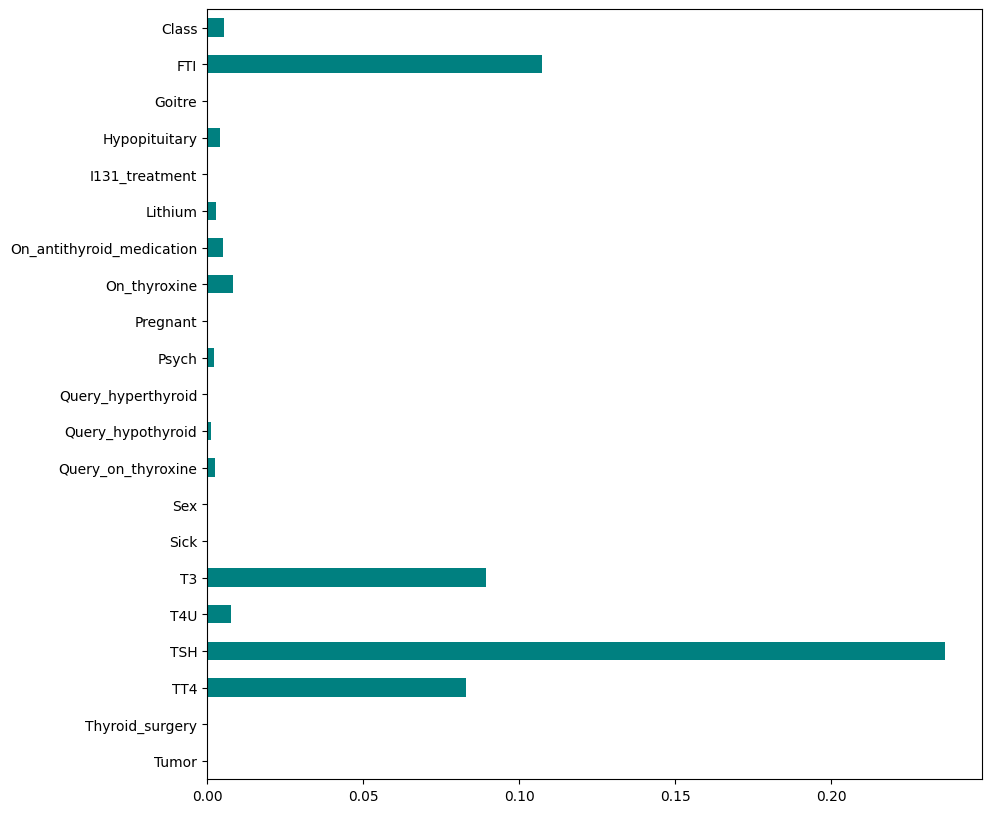

In [43]:
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X,y)
feat_importances=pd.Series(importance,df.columns[0:len(df.columns)-1])
plt.figure(figsize=(10,10))
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [44]:
feat_importances

Tumor                        0.000000
Thyroid_surgery              0.000000
TT4                          0.083035
TSH                          0.236403
T4U                          0.007559
T3                           0.089407
Sick                         0.000000
Sex                          0.000000
Query_on_thyroxine           0.002593
Query_hypothyroid            0.001321
Query_hyperthyroid           0.000000
Psych                        0.002314
Pregnant                     0.000000
On_thyroxine                 0.008242
On_antithyroid_medication    0.005121
Lithium                      0.002941
I131_treatment               0.000000
Hypopituitary                0.004209
Goitre                       0.000000
FTI                          0.107325
Class                        0.005536
dtype: float64

In [45]:
L=list(feat_importances)
L.sort(reverse=True)
L

[0.23640318962015494,
 0.10732500450374594,
 0.08940675117342556,
 0.08303459258209389,
 0.008242219234130044,
 0.00755899242916791,
 0.005535749586103478,
 0.005120612204338348,
 0.004209208432831346,
 0.002940746561189256,
 0.0025929678073912665,
 0.00231354105149828,
 0.0013206111272145993,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [46]:
data=data[['TSH','FTI','T3','TT4']]
X=data

In [47]:
X

,TSH,FTI,T3,TT4
0,-0.200990,-0.143932,1.323636,0.929227
1,-0.129535,-0.971034,0.531679,-0.205117
2,-0.172841,-0.778043,-0.392272,-0.896789
3,-0.200990,1.096721,0.795665,0.818559
4,-0.200990,0.269619,-0.524264,-0.647787
...,...,...,...,...
7123,-0.182369,-0.006081,0.003707,-0.537119
7124,-0.146858,-0.088792,0.016906,-0.537119
7125,-0.168511,-0.171502,0.016906,-0.813789
7126,-0.142527,-0.143932,0.016906,-0.315784


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5702, 4)
(1426, 4)
(5702,)
(1426,)


In [49]:
from sklearn.neighbors import LocalOutlierFactor
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(5437, 4) (5437,)


In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

#from sklearn.linear_model import LogisticRegression
tree=DecisionTreeClassifier()
rfe = RFE(tree,n_features_to_select=4, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
tree.fit(X_train_rfe,y_train)
y_predict=tree.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=1.0 
 MAE  =0.0 
 confusion_matrix=
[[ 240    0    0]
 [   0 5083    0]
 [   0    0  114]] 
 classification_report=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00      5083
           2       1.00      1.00      1.00       114

    accuracy                           1.00      5437
   macro avg       1.00      1.00      1.00      5437
weighted avg       1.00      1.00      1.00      5437



In [52]:
from sklearn.linear_model import LogisticRegression

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
lr=LogisticRegression(C=0.9, solver='liblinear')
rfe = RFE(lr,n_features_to_select=4, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
lr.fit(X_train_rfe,y_train)
y_predict=lr.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.9516277358837594 
 MAE  =0.05223468824719515 
 confusion_matrix=
[[   9  224    7]
 [   4 5065   14]
 [   0   14  100]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.69      0.04      0.07       240
           1       0.96      1.00      0.98      5083
           2       0.83      0.88      0.85       114

    accuracy                           0.95      5437
   macro avg       0.82      0.64      0.63      5437
weighted avg       0.94      0.95      0.93      5437



In [53]:
from sklearn.feature_selection import RFE
from sklearn import svm

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

nb = svm.SVC(kernel='rbf')
nb.fit(X_train, y_train) 

rfe = RFE(nb,n_features_to_select=4, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
nb.fit(X_train_rfe,y_train)
y_predict=nb.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.9711237814971492 
 MAE  =0.0316350928821041 
 confusion_matrix=
[[ 136  103    1]
 [  33 5045    5]
 [   4   11   99]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.79      0.57      0.66       240
           1       0.98      0.99      0.99      5083
           2       0.94      0.87      0.90       114

    accuracy                           0.97      5437
   macro avg       0.90      0.81      0.85      5437
weighted avg       0.97      0.97      0.97      5437



In [54]:
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

classifier = GaussianNB() 

rfe = RFE(classifier,n_features_to_select=4, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
classifier.fit(X_train_rfe,y_train)
y_predict=classifier.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.9565937097664153 
 MAE  =0.048924038992091225 
 confusion_matrix=
[[  66  171    3]
 [  23 5034   26]
 [   7    6  101]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.69      0.28      0.39       240
           1       0.97      0.99      0.98      5083
           2       0.78      0.89      0.83       114

    accuracy                           0.96      5437
   macro avg       0.81      0.72      0.73      5437
weighted avg       0.95      0.96      0.95      5437



In [55]:
from sklearn.feature_selection import RFE
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

nb = svm.SVC(kernel='rbf')
nb.fit(X_train, y_train) 

rfe = RFE(nb,n_features_to_select=4, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
nb.fit(X_train_rfe,y_train)
y_predict=nb.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.9711237814971492 
 MAE  =0.0316350928821041 
 confusion_matrix=
[[ 136  103    1]
 [  33 5045    5]
 [   4   11   99]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.79      0.57      0.66       240
           1       0.98      0.99      0.99      5083
           2       0.94      0.87      0.90       114

    accuracy                           0.97      5437
   macro avg       0.90      0.81      0.85      5437
weighted avg       0.97      0.97      0.97      5437



In [56]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,100):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    Result=model.score(X_test,y_test)
    print(f"neighbors : {i} , score : {Result}")

neighbors : 1 , score : 0.967741935483871
neighbors : 2 , score : 0.9635343618513323
neighbors : 3 , score : 0.9663394109396914
neighbors : 4 , score : 0.9712482468443198
neighbors : 5 , score : 0.9628330995792427
neighbors : 6 , score : 0.9663394109396914
neighbors : 7 , score : 0.9600280504908836
neighbors : 8 , score : 0.9607293127629734
neighbors : 9 , score : 0.958625525946704
neighbors : 10 , score : 0.9593267882187938
neighbors : 11 , score : 0.9607293127629734
neighbors : 12 , score : 0.9621318373071529
neighbors : 13 , score : 0.9621318373071529
neighbors : 14 , score : 0.9628330995792427
neighbors : 15 , score : 0.9628330995792427
neighbors : 16 , score : 0.9621318373071529
neighbors : 17 , score : 0.9614305750350631
neighbors : 18 , score : 0.9614305750350631
neighbors : 19 , score : 0.9621318373071529
neighbors : 20 , score : 0.9614305750350631
neighbors : 21 , score : 0.9607293127629734
neighbors : 22 , score : 0.9621318373071529
neighbors : 23 , score : 0.9607293127629734

The accuracy of KNN is:  0.97
[[  56   22    2]
 [  10 1293    2]
 [   3    2   36]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        80
           1       0.98      0.99      0.99      1305
           2       0.90      0.88      0.89        41

    accuracy                           0.97      1426
   macro avg       0.90      0.86      0.88      1426
weighted avg       0.97      0.97      0.97      1426



<Axes: >

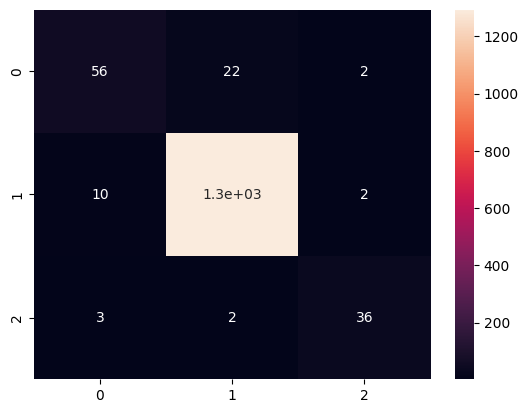

In [57]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
#print('y_predict={} \n y_test  ={}'.format(y_pred,y_test))
ac = accuracy_score(y_test,y_pred)
print('The accuracy of KNN is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
sns.heatmap(cm,annot=True)

In [58]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,20):
    classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state=4)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    ac=metrics.accuracy_score(y_test, y_pred)
    print('The accuracy of Decision Tree Classification is: ', round(ac,2),'i=',i)

The accuracy of Decision Tree Classification is:  0.94 i= 1
The accuracy of Decision Tree Classification is:  0.97 i= 2
The accuracy of Decision Tree Classification is:  0.98 i= 3
The accuracy of Decision Tree Classification is:  0.98 i= 4
The accuracy of Decision Tree Classification is:  0.98 i= 5
The accuracy of Decision Tree Classification is:  0.99 i= 6
The accuracy of Decision Tree Classification is:  0.99 i= 7
The accuracy of Decision Tree Classification is:  0.98 i= 8
The accuracy of Decision Tree Classification is:  0.98 i= 9
The accuracy of Decision Tree Classification is:  0.98 i= 10
The accuracy of Decision Tree Classification is:  0.98 i= 11
The accuracy of Decision Tree Classification is:  0.98 i= 12
The accuracy of Decision Tree Classification is:  0.98 i= 13
The accuracy of Decision Tree Classification is:  0.98 i= 14
The accuracy of Decision Tree Classification is:  0.98 i= 15
The accuracy of Decision Tree Classification is:  0.98 i= 16
The accuracy of Decision Tree Cla

The accuracy of Decision Tree Classification is:  0.99
[[  76    4    0]
 [  13 1290    2]
 [   0    1   40]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        80
           1       1.00      0.99      0.99      1305
           2       0.95      0.98      0.96        41

    accuracy                           0.99      1426
   macro avg       0.93      0.97      0.95      1426
weighted avg       0.99      0.99      0.99      1426



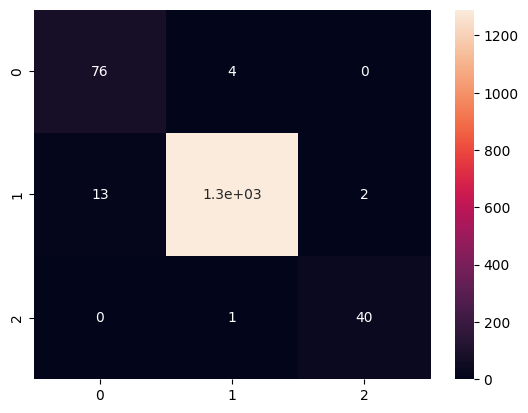

In [59]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Decision Tree Classification is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Logistic Regression is:  0.94
[[   0   74    6]
 [   0 1303    2]
 [   0    8   33]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.94      1.00      0.97      1305
           2       0.80      0.80      0.80        41

    accuracy                           0.94      1426
   macro avg       0.58      0.60      0.59      1426
weighted avg       0.88      0.94      0.91      1426



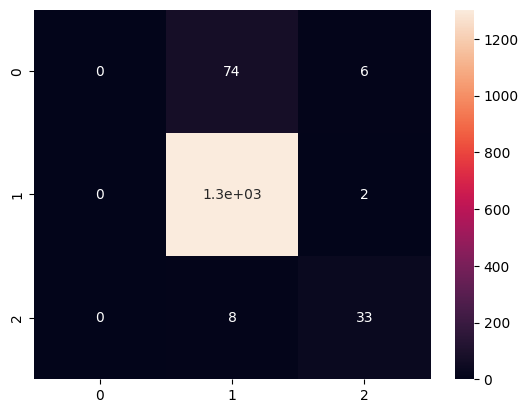

In [60]:
# Classification LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Logistic Regression is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

Accuracy of the SVM Model:  0.96
[[  44   35    1]
 [  10 1293    2]
 [   3    5   33]]
              precision    recall  f1-score   support

           0       0.77      0.55      0.64        80
           1       0.97      0.99      0.98      1305
           2       0.92      0.80      0.86        41

    accuracy                           0.96      1426
   macro avg       0.89      0.78      0.83      1426
weighted avg       0.96      0.96      0.96      1426



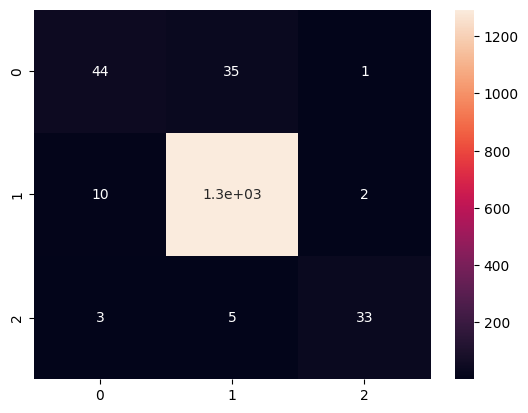

In [61]:
# Classification SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM Model: ",round(accuracy,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Naive bayes is:  0.9488078541374474
[[  25   51    4]
 [   6 1293    6]
 [   5    1   35]]
              precision    recall  f1-score   support

           0       0.69      0.31      0.43        80
           1       0.96      0.99      0.98      1305
           2       0.78      0.85      0.81        41

    accuracy                           0.95      1426
   macro avg       0.81      0.72      0.74      1426
weighted avg       0.94      0.95      0.94      1426



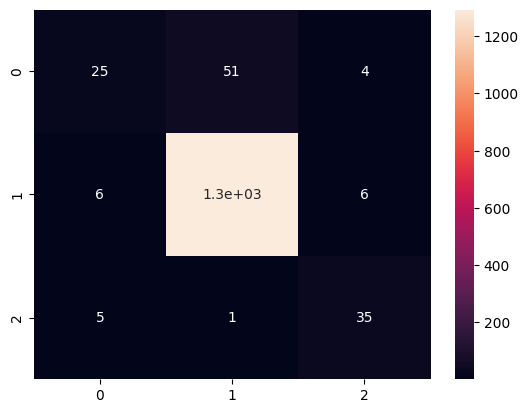

In [62]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('The accuracy of Naive bayes is: ', ac)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

In [63]:
df.dtypes

Tumor                          int32
Thyroid_surgery                int32
TT4                          float64
TSH                          float64
T4U                          float64
T3                           float64
Sick                           int32
Sex                            int32
Query_on_thyroxine             int32
Query_hypothyroid              int32
Query_hyperthyroid             int32
Psych                          int32
Pregnant                       int32
On_thyroxine                   int32
On_antithyroid_medication      int32
Lithium                        int32
I131_treatment                 int32
Hypopituitary                  int32
Goitre                         int32
FTI                          float64
Class                          int32
Age                            int32
dtype: object